In [1]:
import warnings

import numpy as np
import pandas as pd
import patchworklib as pw
from plotnine import *
from skimpy import skim

%matplotlib inline
warnings.filterwarnings("ignore")

<Figure size 100x100 with 0 Axes>

In [2]:
data = pd.read_csv("data_for_Assignment1.csv")

In [3]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945.0,https://www.airbnb.com/rooms/97945,2.020000e+13,6/27/2024,city scrape,Deluxw-Apartm. with roof terrace,NaN,We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,...,4.93,4.78,4.73,NaN,f,2,2,0,0,0.82
1,114695.0,https://www.airbnb.com/rooms/114695,2.020000e+13,6/27/2024,city scrape,Apartment Munich/East with sundeck,NaN,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737,...,5.00,4.63,4.59,NaN,f,3,3,0,0,0.44
2,127383.0,https://www.airbnb.com/rooms/127383,2.020000e+13,6/27/2024,previous scrape,City apartment next to Pinakothek,NaN,NaN,https://a0.muscache.com/pictures/79238c11-bc61...,630556,...,4.95,4.91,4.80,NaN,f,1,1,0,0,0.70
3,159634.0,https://www.airbnb.com/rooms/159634,2.020000e+13,6/27/2024,city scrape,"Fancy, bright central roof top flat and homeof...",In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/72bdd2e1-914e...,765694,...,4.80,4.58,4.45,NaN,t,1,1,0,0,0.26
4,170154.0,https://www.airbnb.com/rooms/170154,2.020000e+13,6/27/2024,city scrape,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,108297,...,4.98,4.77,4.91,NaN,f,1,0,1,0,3.60


In [4]:
data.describe()

,id,scrape_id,host_id,price,month_of_starting_host,day_of_starting_host,year_of_starting_host,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.745000e+03,6.745000e+03,6.745000e+03,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000,0.0,...,5317.00000,5317.000000,5317.000000,5317.000000,5317.000000,6745.000000,6745.000000,6745.000000,6745.000000,5326.000000
mean,5.101703e+17,2.020000e+13,1.845231e+08,136.194811,6.608451,15.645812,2017.115493,5.633358,7.065234,NaN,...,4.74135,4.858219,4.867254,4.794922,4.645055,3.231875,2.399110,0.792587,0.021497,0.990657
std,4.716764e+17,0.000000e+00,1.837233e+08,1189.649941,3.190030,8.816056,3.434893,36.561917,43.001340,NaN,...,0.39550,0.304860,0.299278,0.316238,0.397953,9.086292,8.988885,2.098580,0.202257,1.663104
min,9.794500e+04,2.020000e+13,1.581000e+03,0.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,NaN,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.511415e+07,2.020000e+13,2.568048e+07,0.000000,4.000000,8.000000,2015.000000,1.000000,1.000000,NaN,...,4.65000,4.830000,4.850000,4.710000,4.500000,1.000000,0.000000,0.000000,0.000000,0.180000
50%,6.790000e+17,2.020000e+13,1.072799e+08,85.000000,7.000000,15.000000,2016.000000,1.000000,2.000000,NaN,...,4.88000,4.960000,5.000000,4.890000,4.730000,1.000000,1.000000,0.000000,0.000000,0.450000
75%,9.640000e+17,2.020000e+13,3.404104e+08,154.000000,9.000000,23.000000,2020.000000,2.000000,3.000000,NaN,...,5.00000,5.000000,5.000000,5.000000,4.910000,2.000000,1.000000,1.000000,0.000000,1.140000
max,1.190000e+18,2.020000e+13,5.856747e+08,96274.000000,12.000000,31.000000,2024.000000,708.000000,912.000000,NaN,...,5.00000,5.000000,5.000000,5.000000,5.000000,79.000000,79.000000,24.000000,3.000000,50.560000


In [5]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # No line width limit (for long lines)
pd.set_option('display.max_colwidth', None)  # Allow wide columns

na_count = data.isnull().sum()
na_count

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                      291
neighborhood_overview                           4020
picture_url                                        0
host_id                                            0
price                                              0
host_url                                           0
host_name                                          0
month_of_starting_host                             0
day_of_starting_host                               0
year_of_starting_host                              0
host_location                                   1438
host_about                                      4099
host_response_time                            

In [6]:
data = data.filter(["price", "year_of_starting_host", "host_acceptance_rate", "room_type", "accommodates", "number_of_reviews", "review_scores_rating", "latitude", "longitude"])

In [7]:
list_var = ["price", "year_of_starting_host", "host_acceptance_rate", "room_type", "accommodates", "number_of_reviews", "review_scores_rating", "latitude", "longitude"]
data.filter(list_var).describe(percentiles=[0.25, 0.5, 0.75, 0.95]).T

,count,mean,std,min,25%,50%,75%,95%,max
price,6745.0,136.194811,1189.649941,0.000000,0.00000,85.00000,154.000000,400.000000,96274.000000
year_of_starting_host,6745.0,2017.115493,3.434893,2008.000000,2015.00000,2016.00000,2020.000000,2023.000000,2024.000000
accommodates,6745.0,2.744255,1.642854,1.000000,2.00000,2.00000,4.000000,6.000000,16.000000
number_of_reviews,6745.0,26.520534,78.001670,0.000000,1.00000,5.00000,19.000000,116.000000,1955.000000
review_scores_rating,5326.0,4.793704,0.327992,1.000000,4.71000,4.90000,5.000000,5.000000,5.000000
latitude,6745.0,48.139651,0.025485,48.071684,48.12303,48.13700,48.155750,48.184020,48.228020
longitude,6745.0,11.562865,0.049754,11.388350,11.53882,11.56445,11.586736,11.646859,11.712699


In [8]:
skim(data.filter(list_var))

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6745   │ │ int32       │ 4     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA    ┃ NA %   ┃ mean   ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ price                 │     0 │      0 │  136.2 │    1190 │     0 │     0 │    85 │   154 │ 96270 │   ▇    │  │
│ │ year_of_starting_host │     0 │      0 │   2017 │   3.435 │  2008 │  2015 │  2016 │  2020 │  2024 │  ▃▆▇▅▅ │  │
│ │ accommodates          │     0 │      0 │  2.744 │   1.643 │     1 │     2 │     2 │     4 │    16 │  ▇▂▁   │  │
│ │ number_of_reviews     │     0 │      0 │  26.52 │      78 │     0 │     1 │     5 │    19 │  1955 │   ▇    │  │
│ │ review_scores_rating  │  1419 │  21.04 │  4.794 │   0.328 │     1 │  4.71 │   4.9 │     5 │     5 │     ▁▇ │  │
│ │ latitude              │     0 │      0 │  48.14 │ 0.02549 │ 48.07 │ 48.12 │ 48.14 │ 48.16 │ 48.23 │ ▁▅▇▅▂  │  │
│ │ longitude             │     0 │      0 │  11.56 │ 0.04975 │ 11.39 │ 11.54 │ 11.56 │ 11.59 │ 11.71 │  ▁▅▇▂▁ │  │
│ └───────────────────────┴───────┴────────┴────────┴─────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA       ┃ NA %       ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ host_acceptance_rate                │     1232 │      18.27 │                    0.82 │               5513 │  │
│ │ room_type                           │        0 │          0 │                       2 │              13490 │  │
│ └─────────────────────────────────────┴──────────┴────────────┴─────────────────────────┴────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [9]:
data = data.dropna()

In [76]:
!pip install scikit-misc

SyntaxError: invalid syntax (2218498478.py, line 2)

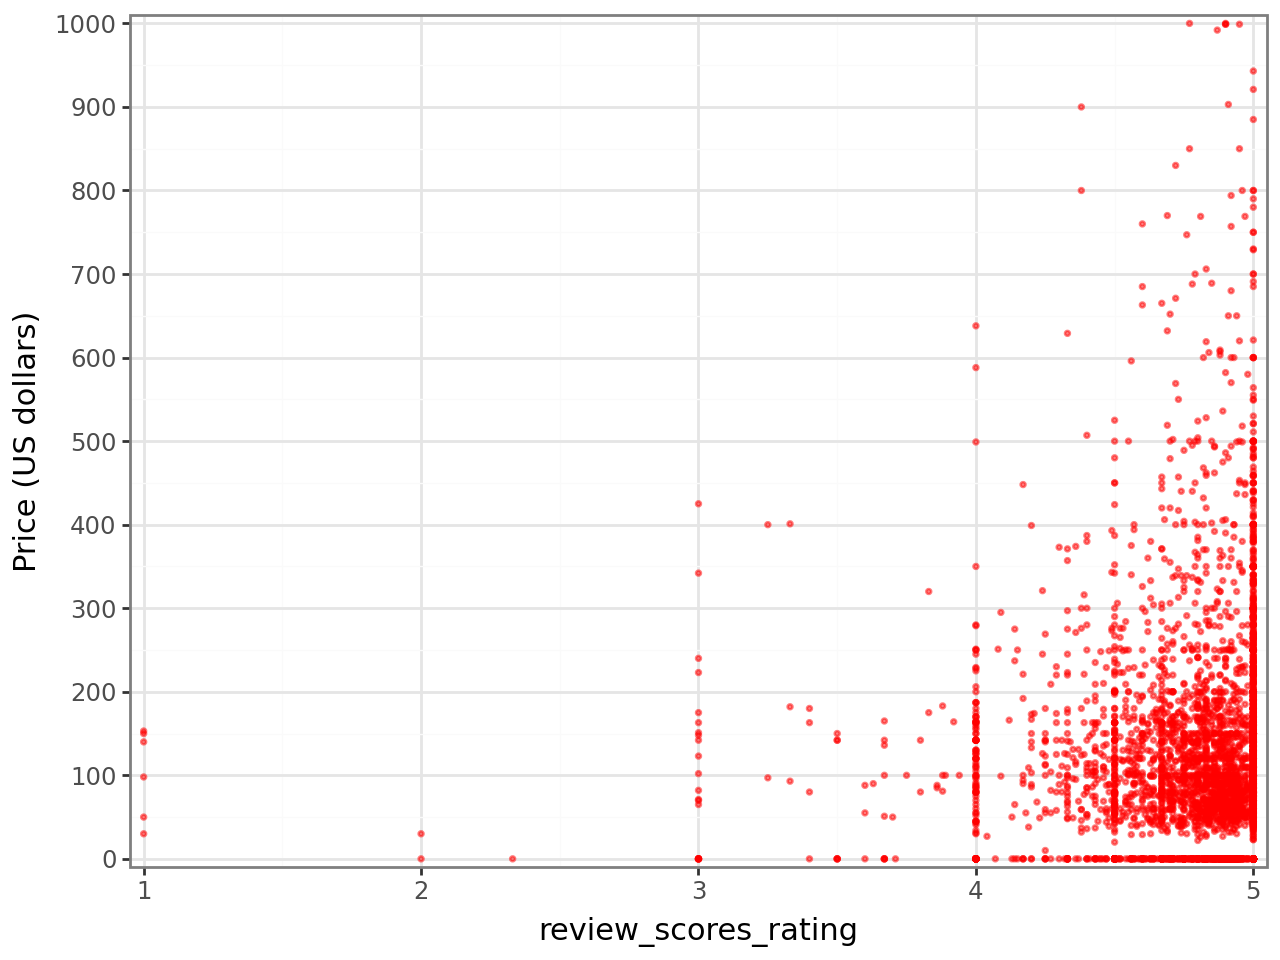

In [73]:
p1 = (
    ggplot(data=data)
    + geom_point(aes(x = "review_scores_rating", y = "price"), color="red", size = 0.5, alpha = 0.5)
    + expand_limits(x = 0.01, y = 0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(1, 5))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 1000), breaks=np.arange(0, 1001, 100)
    )
    + labs(x="review_scores_rating", y="Price (US dollars)")
    + theme_bw()
)
p1

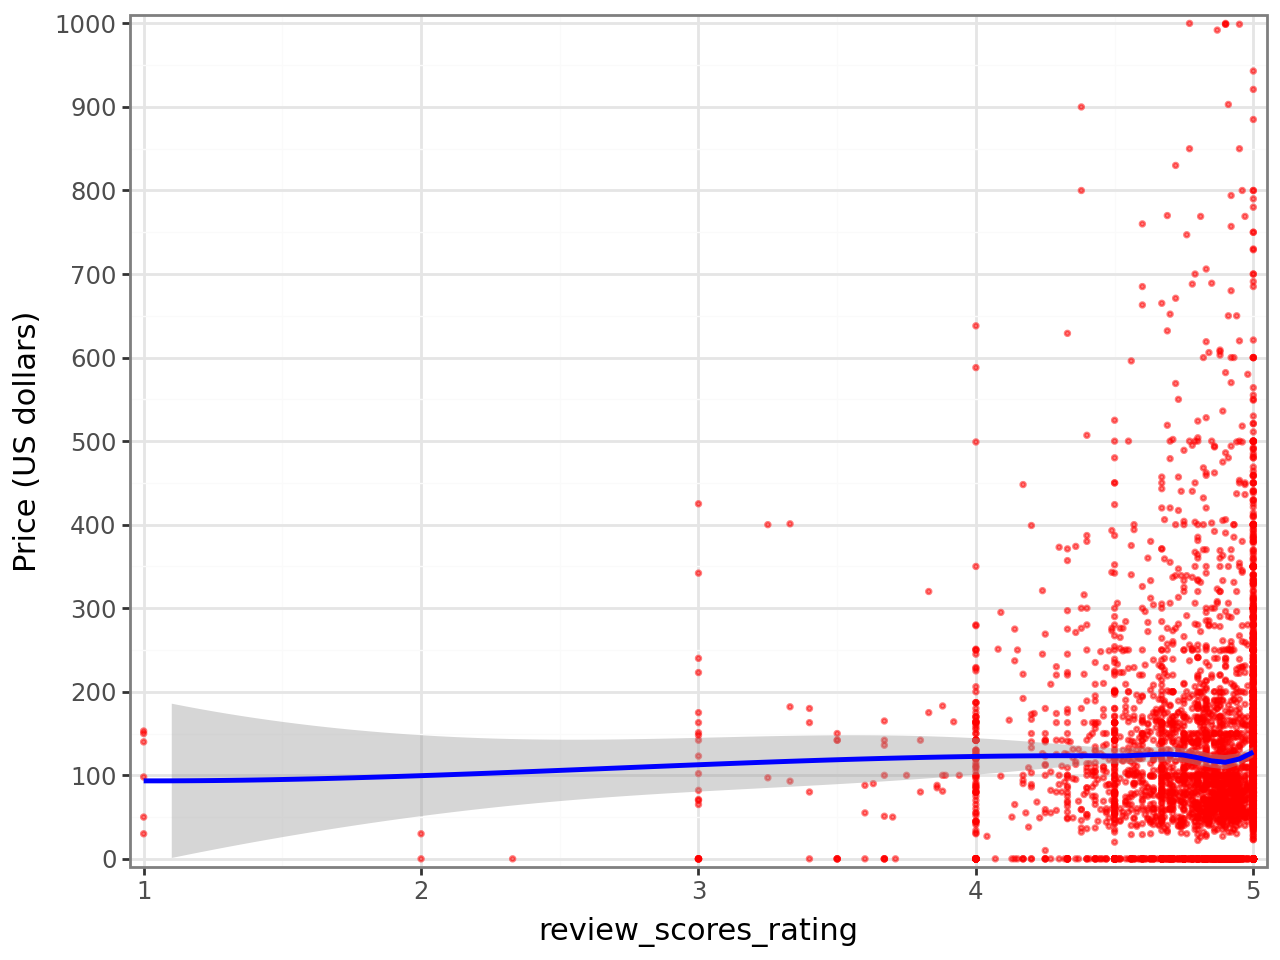

In [79]:
p1 + geom_smooth(aes(x = "review_scores_rating", y = "price"), color = "blue", method = "loess", se = True)

In [11]:
data["room_type_binary"] = np.where(data["room_type"] == "Entire home/apt", 1, 0)

In [12]:
(
     data.melt(id_vars="room_type", value_vars=["review_scores_rating", "price"])
    .groupby(["room_type", "variable"])
    .agg(["mean", "std", "min", "max", "count"])
    .round(2)
)

value                            
                                        mean     std   min     max count
room_type       variable                                                
Entire home/apt price                 150.47  163.98  0.00  2199.0  2951
                review_scores_rating    4.78    0.33  1.00     5.0  2951
Hotel room      price                 126.59  198.93  0.00   700.0    22
                review_scores_rating    4.49    0.35  3.88     5.0    22
Private room    price                  79.64   87.25  0.00   999.0  1535
                review_scores_rating    4.81    0.33  1.00     5.0  1535
Shared room     price                 147.79  278.59  0.00   999.0    28
                review_scores_rating    4.70    0.39  3.00     5.0    28

In [13]:
data = data[(data["room_type"] == "Entire home/apt") | (data["room_type"] == "Private room")]

In [15]:
import statsmodels.formula.api as smf
from mizani.formatters import percent_format

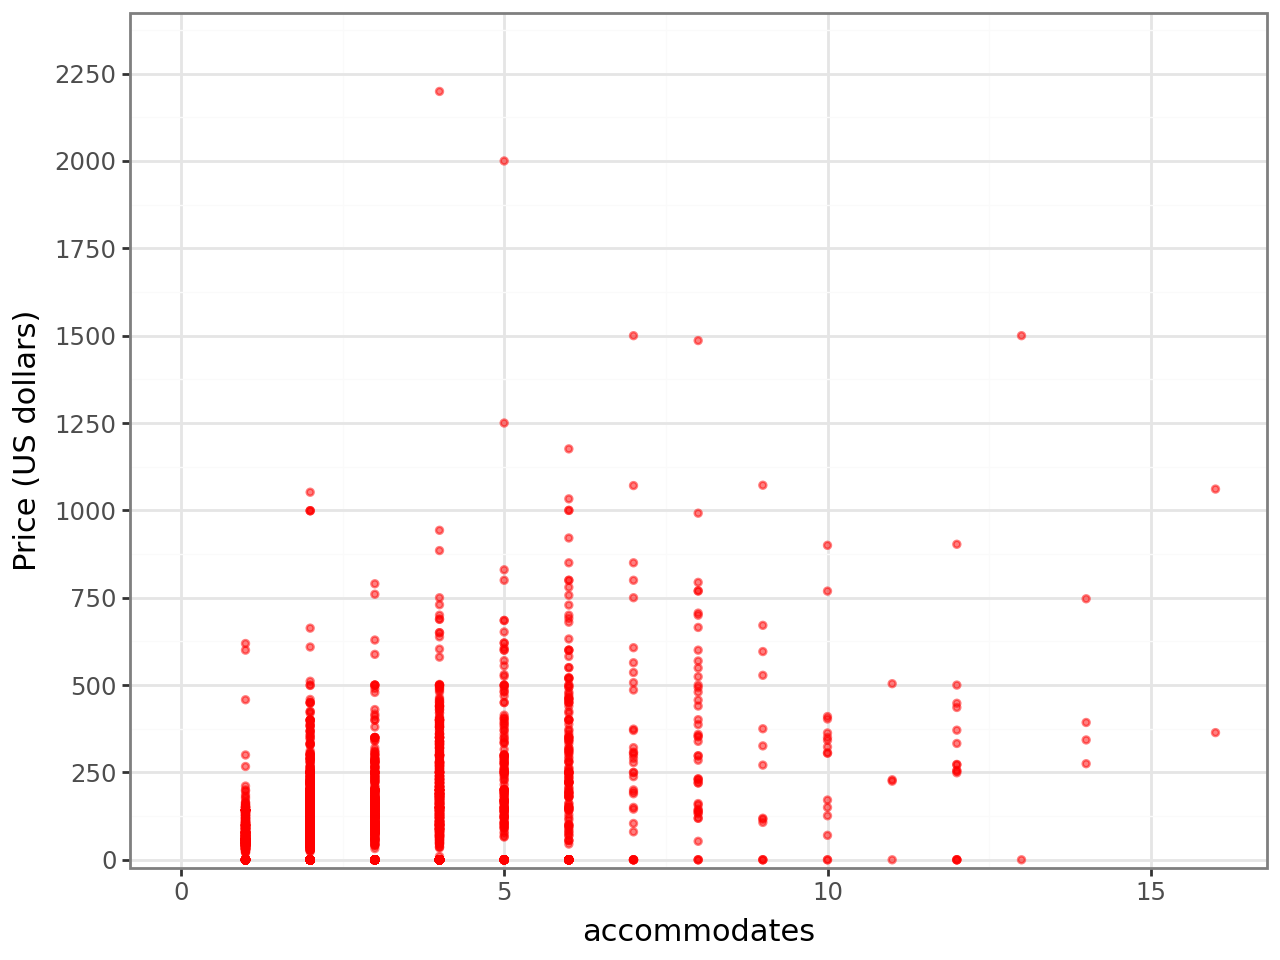

In [38]:
plot = (
    ggplot(data = data)
    + geom_point(aes(x = "accommodates", y = "price"), color = "red", size=0.9, alpha=0.5)
    + expand_limits(x = 0.01, y = 0.01)
    + scale_y_continuous(
        expand=(0.01, 0.05), limits=(0, 2400), breaks=np.arange(0, 2401, 250)
    )
    + labs(x = "accommodates", y = "Price (US dollars)")
    + theme_bw()
)
plot

In [40]:
list_var

['price',
 'year_of_starting_host',
 'host_acceptance_rate',
 'room_type',
 'accommodates',
 'number_of_reviews',
 'review_scores_rating',
 'latitude',
 'longitude']

In [ ]:
data["host_acceptance_rate"] = data["host_acceptance_rate"].str.replace('%', '').astype(float).astype(int)

In [56]:
data["host_acceptance_rate"] = data["host_acceptance_rate"]/100

In [63]:
reg1 = smf.ols("price ~ accommodates + review_scores_rating + room_type_binary + year_of_starting_host", data = data).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     266.4
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          1.07e-205
Time:                        13:32:51   Log-Likelihood:                -28254.
No. Observations:                4486   AIC:                         5.652e+04
Df Residuals:                    4481   BIC:                         5.655e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -3530.36

In [83]:
data["log_price"] = data["price"].apply(lambda x: np.log(x) if x > 0 else 0)

In [86]:
data = data[data["price"] != 0]

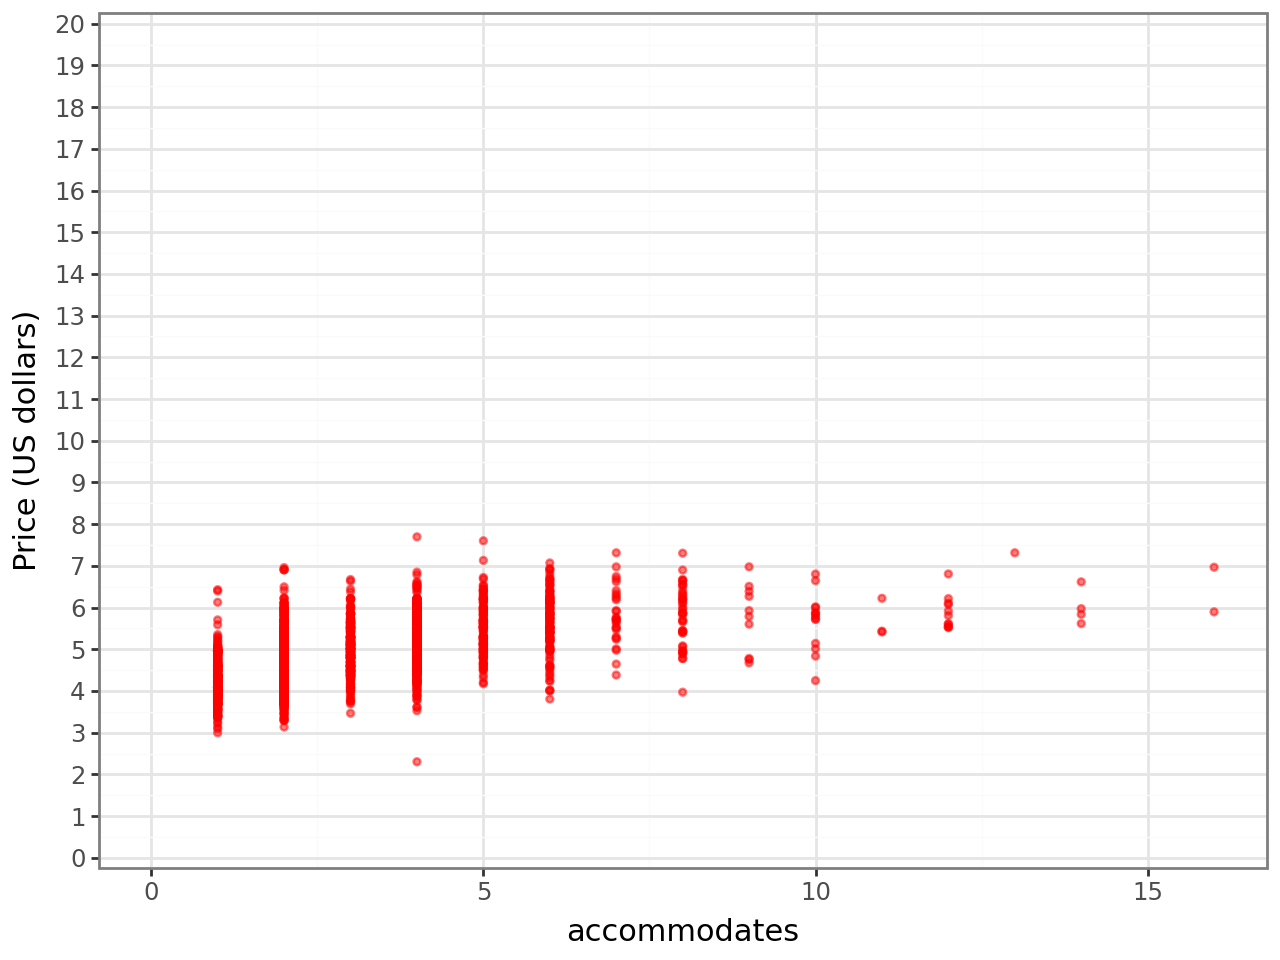

In [90]:
logplot = (
    ggplot(data = data)
    + geom_point(aes(x = "accommodates", y = "log_price"), color = "red", size=0.9, alpha=0.5)
    + expand_limits(x = 0.01, y = 0.01)
    + scale_y_continuous(
        expand=(0.01, 0.05), limits=(0, 20), breaks=np.arange(0, 21, 1)
    )
    + labs(x = "accommodates", y = "Price (US dollars)")
    + theme_bw()
) 
logplot

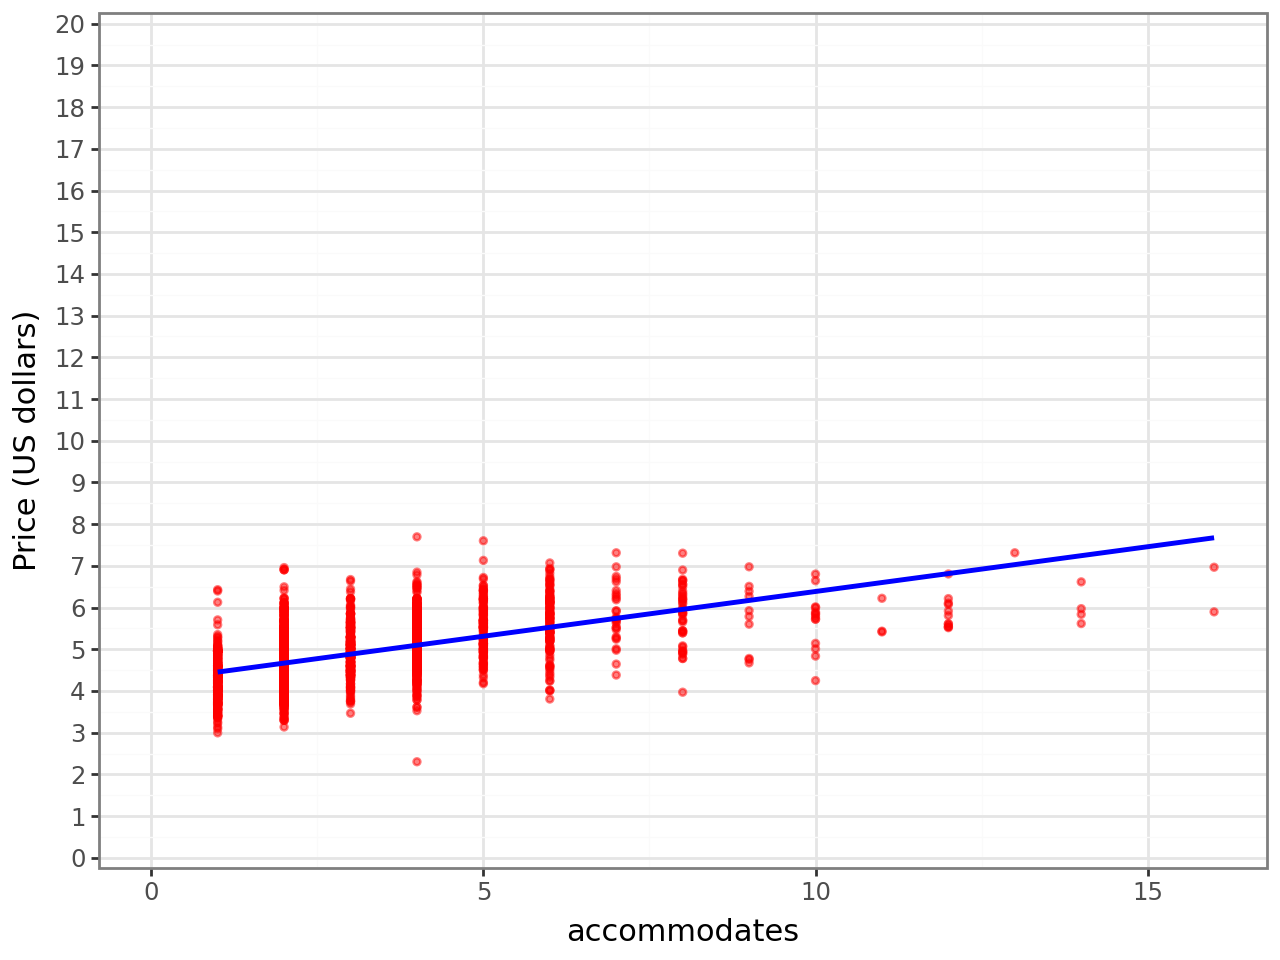

In [96]:
logplot + geom_smooth(
    aes(x = "accommodates", y = "log_price"), method="lm", color="blue", formula="y~x", se=False
)

In [ ]:
data.describe(percentiles=[0.25, 0.5, 0.75, 0.95]).T

In [ ]:
reg2 = smf.ols("log_price ~ accommodates + review_scores_rating + room_type_binary + year_of_starting_host", data = data).fit()
print(reg2.summary())

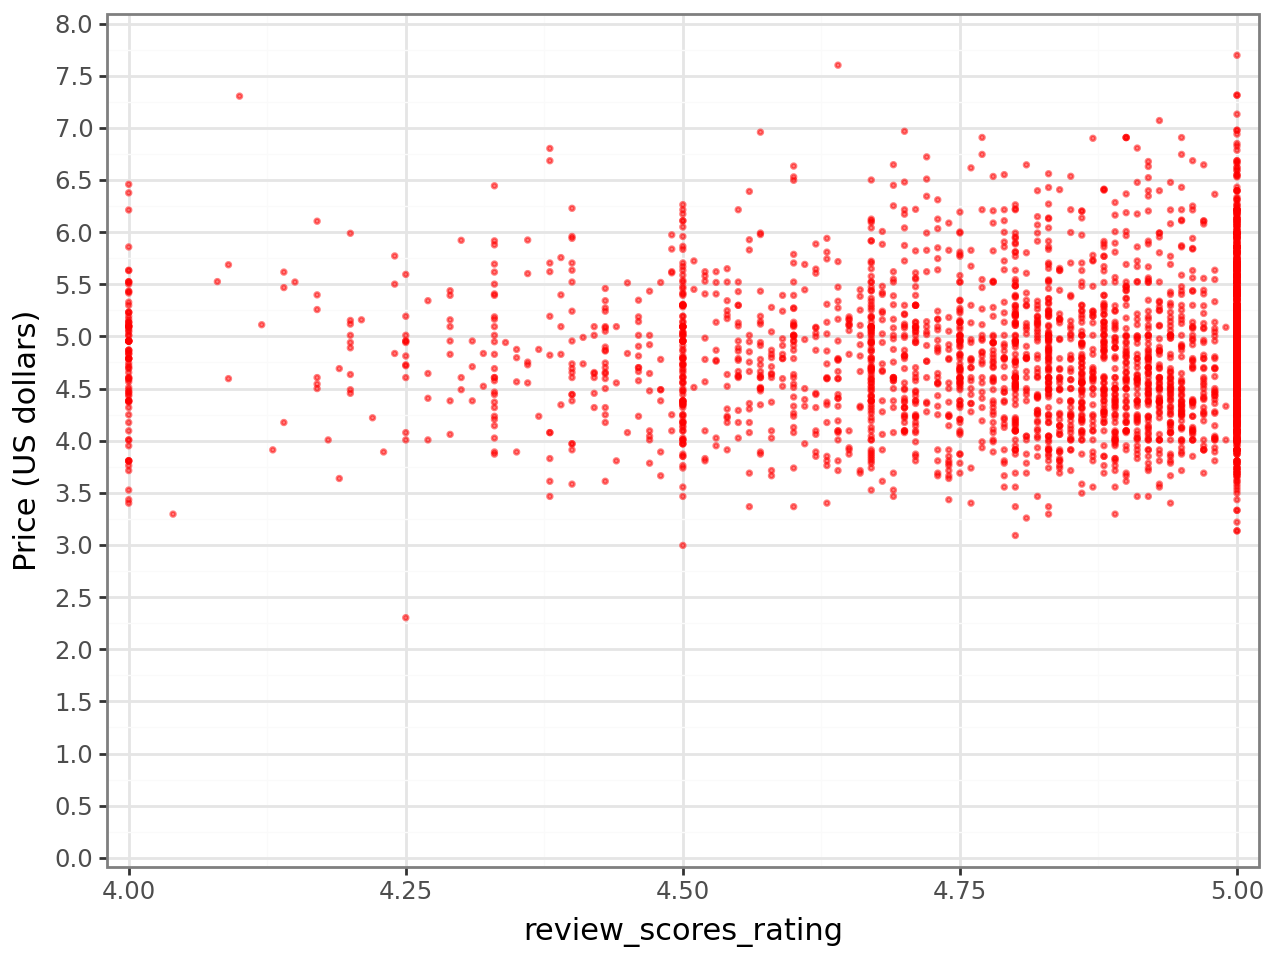

In [110]:
log_p1 = (
    ggplot(data=data)
    + geom_point(aes(x = "review_scores_rating", y = "log_price"), color="red", size = 0.5, alpha = 0.5)
    + expand_limits(x = 0.01, y = 0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(4, 5))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 8), breaks=np.arange(0, 9, 0.5)
    )
    + labs(x="review_scores_rating", y="Price (US dollars)")
    + theme_bw()
)
log_p1

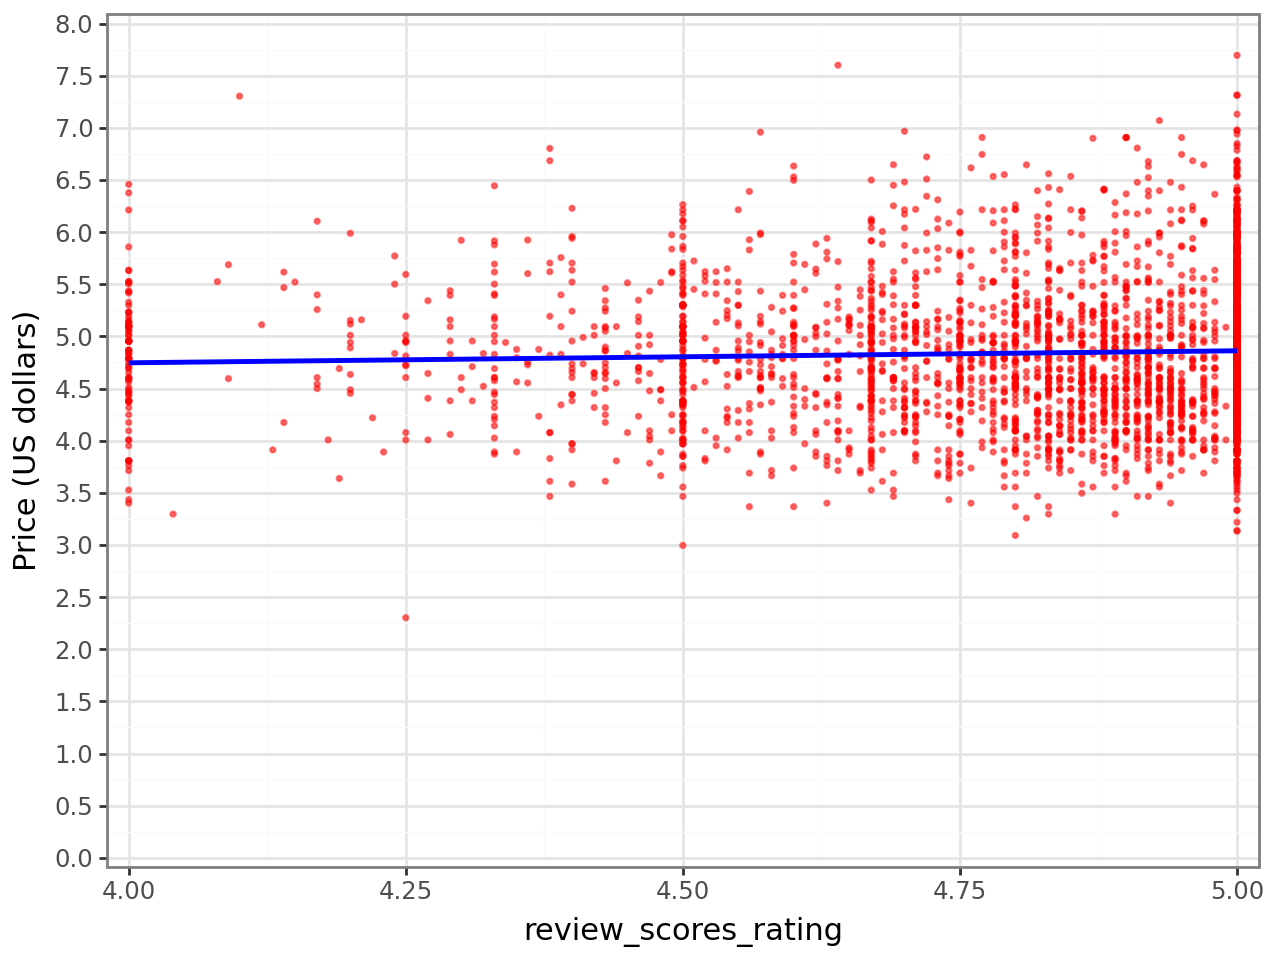

In [111]:
log_p1 + geom_smooth(
    aes(x = "review_scores_rating", y = "log_price"), method="lm", color="blue", formula="y~x", se=False
)

In [112]:
data = data[data["review_scores_rating"] >= 4]

In [113]:
reg3 = smf.ols("log_price ~ accommodates + review_scores_rating + room_type_binary + year_of_starting_host", data = data).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     567.9
Date:                Sun, 10 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:56:24   Log-Likelihood:                -2602.2
No. Observations:                3444   AIC:                             5214.
Df Residuals:                    3439   BIC:                             5245.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -21.58